In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

In [2]:
train = pd.read_csv('./data/backfilled_data.csv')
test = pd.read_csv('./data/backfilled_test.csv')

In [3]:
pd.set_option('display.max_rows', None)
print(train.isna().sum())

ID                        0
Policy_Start_Date         0
Policy_End_Date           0
Gender                    0
Age                       0
First_Transaction_Date    0
No_Pol                    0
Car_Category              0
Subject_Car_Colour        0
Subject_Car_Make          0
LGA_Name                  0
State                     0
ProductName               0
target                    0
dtype: int64


In [4]:
pd.set_option('display.max_rows', None)
print(test.isna().sum())

ID                        0
Policy_Start_Date         0
Policy_End_Date           0
Gender                    0
Age                       0
First_Transaction_Date    0
No_Pol                    0
Car_Category              2
Subject_Car_Colour        0
Subject_Car_Make          0
LGA_Name                  0
State                     0
ProductName               0
dtype: int64


# Model Training

In [5]:
train.head()

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_O51ZQ1B,2001-12-11,2011-12-10,Female,37.0,2001-12-11,1,Saloon,Black,Honda,Ekiti,Benue,Car Vintage,0
1,ID_VJ1FAVO,2002-03-25,2011-03-24,Male,37.0,2002-03-25,1,Saloon,Black,TOYOTA,Ekiti,Benue,Car Classic,0
2,ID_ULWS8VL,2003-04-13,2011-04-12,Male,41.0,2003-04-13,2,Saloon,Black,TOYOTA,Ikeja,Lagos,Car Vintage,0
3,ID_ZYKGSP7,2003-12-21,2034-05-20,Male,48.0,2003-12-21,2,Saloon,Gold,BMW,Ajah,Lagos,Car Vintage,0
4,ID_OEWBKGF,2005-08-05,2011-09-29,Female,44.0,2005-08-05,1,Saloon,Gold,Tata,Ajah,Lagos,CVTP,0


In [6]:
test.head()

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_6JEYVLP,2010-01-01,2010-12-31,Male,35.0,2010-01-01,1,JEEP,As Attached,ACURA,Lagos Island,Lagos,CarSafe
1,ID_BX1PNZ6,2010-01-01,2011-05-31,Entity,93.0,2010-01-01,7,JEEP,As Attached,Honda,Lagos Island,Lagos,CarSafe
2,ID_83NJU2D,2010-01-01,2010-12-31,Male,120.0,2010-01-01,4,JEEP,White,Ford,Victoria Island,Lagos,Muuve
3,ID_Q6GKOAQ,2010-01-02,2011-01-01,Female,45.0,2010-01-02,1,JEEP,White,Ford,Victoria Island,Lagos,Car Classic
4,ID_WB3E64W,2010-01-02,2011-01-01,Male,66.0,2010-01-02,1,Saloon,As Attached,TOYOTA,Victoria Island,Lagos,CarSafe


In [7]:
train['Policy_Start_Date'] = pd.to_datetime(train['Policy_Start_Date'])
train['Policy_End_Date'] = pd.to_datetime(train['Policy_End_Date'])
train['First_Transaction_Date'] = pd.to_datetime(train['First_Transaction_Date'])

test['Policy_Start_Date'] = pd.to_datetime(test['Policy_Start_Date'])
test['Policy_End_Date'] = pd.to_datetime(test['Policy_End_Date'])
test['First_Transaction_Date'] = pd.to_datetime(test['First_Transaction_Date'])

In [8]:
train['StartYear'] = train['Policy_Start_Date'].dt.year
train['EndYear'] = train['Policy_End_Date'].dt.year
train['FirstYear'] = train['First_Transaction_Date'].dt.year

train['StartMonth'] = train['Policy_Start_Date'].dt.month
train['EndMonth'] = train['Policy_End_Date'].dt.month
train['FirstMonth'] = train['First_Transaction_Date'].dt.month

train['StartDay'] = train['Policy_Start_Date'].dt.day
train['EndDay'] = train['Policy_End_Date'].dt.day
train['FirstDay'] = train['First_Transaction_Date'].dt.day

In [9]:
test['StartYear'] = test['Policy_Start_Date'].dt.year
test['EndYear'] = test['Policy_End_Date'].dt.year
test['FirstYear'] = test['First_Transaction_Date'].dt.year

test['StartMonth'] = test['Policy_Start_Date'].dt.month
test['EndMonth'] = test['Policy_End_Date'].dt.month
test['FirstMonth'] = test['First_Transaction_Date'].dt.month

test['StartDay'] = test['Policy_Start_Date'].dt.day
test['EndDay'] = test['Policy_End_Date'].dt.day
test['FirstDay'] = test['First_Transaction_Date'].dt.day

In [11]:
train['Policy_Tenure'] = train['EndMonth'] - train['StartMonth']
test['Policy_Tenure'] = test['EndMonth'] - test['StartMonth']

# today = pd.Timestamp.today()
# train['Recency'] = (today - train['Policy_End_Date']).dt.days
# test['Recency'] = (today - test['Policy_End_Date']).dt.days

In [12]:
train.head()

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,StartYear,EndYear,FirstYear,StartMonth,EndMonth,FirstMonth,StartDay,EndDay,FirstDay,Policy_Tenure
0,ID_O51ZQ1B,2001-12-11,2011-12-10,Female,37.0,2001-12-11,1,Saloon,Black,Honda,...,2001,2011,2001,12,12,12,11,10,11,0
1,ID_VJ1FAVO,2002-03-25,2011-03-24,Male,37.0,2002-03-25,1,Saloon,Black,TOYOTA,...,2002,2011,2002,3,3,3,25,24,25,0
2,ID_ULWS8VL,2003-04-13,2011-04-12,Male,41.0,2003-04-13,2,Saloon,Black,TOYOTA,...,2003,2011,2003,4,4,4,13,12,13,0
3,ID_ZYKGSP7,2003-12-21,2034-05-20,Male,48.0,2003-12-21,2,Saloon,Gold,BMW,...,2003,2034,2003,12,5,12,21,20,21,-7
4,ID_OEWBKGF,2005-08-05,2011-09-29,Female,44.0,2005-08-05,1,Saloon,Gold,Tata,...,2005,2011,2005,8,9,8,5,29,5,1


In [13]:
categorical_columns = ['Age','Gender', 'Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']

le = LabelEncoder()
for col in categorical_columns:
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.fit_transform(test[col].astype(str))

In [13]:
# encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# encoded_train = encoder.fit_transform(train[categorical_columns])
# encoded_test = encoder.transform(test[categorical_columns])

# encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_columns))
# encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

# train = train.drop(columns=categorical_columns).reset_index(drop=True)
# test = test.drop(columns=categorical_columns).reset_index(drop=True)

# train = pd.concat([train, encoded_train_df], axis=1)
# test = pd.concat([test, encoded_test_df], axis=1)

In [14]:
train.head()

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,StartYear,EndYear,FirstYear,StartMonth,EndMonth,FirstMonth,StartDay,EndDay,FirstDay,Policy_Tenure
0,ID_O51ZQ1B,2001-12-11,2011-12-10,1,32,2001-12-11,1,8,4,25,...,2001,2011,2001,12,12,12,11,10,11,0
1,ID_VJ1FAVO,2002-03-25,2011-03-24,3,32,2002-03-25,1,8,4,66,...,2002,2011,2002,3,3,3,25,24,25,0
2,ID_ULWS8VL,2003-04-13,2011-04-12,3,37,2003-04-13,2,8,4,66,...,2003,2011,2003,4,4,4,13,12,13,0
3,ID_ZYKGSP7,2003-12-21,2034-05-20,3,44,2003-12-21,2,8,22,6,...,2003,2034,2003,12,5,12,21,20,21,-7
4,ID_OEWBKGF,2005-08-05,2011-09-29,1,40,2005-08-05,1,8,22,67,...,2005,2011,2005,8,9,8,5,29,5,1


In [15]:
test.head()

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,StartYear,EndYear,FirstYear,StartMonth,EndMonth,FirstMonth,StartDay,EndDay,FirstDay,Policy_Tenure
0,ID_6JEYVLP,2010-01-01,2010-12-31,3,17,2010-01-01,1,1,0,0,...,2010,2010,2010,1,12,1,1,31,1,11
1,ID_BX1PNZ6,2010-01-01,2011-05-31,0,67,2010-01-01,7,1,0,10,...,2010,2011,2010,1,5,1,1,31,1,4
2,ID_83NJU2D,2010-01-01,2010-12-31,3,1,2010-01-01,4,1,15,8,...,2010,2010,2010,1,12,1,1,31,1,11
3,ID_Q6GKOAQ,2010-01-02,2011-01-01,1,27,2010-01-02,1,1,15,8,...,2010,2011,2010,1,1,1,2,1,2,0
4,ID_WB3E64W,2010-01-02,2011-01-01,3,49,2010-01-02,1,6,0,33,...,2010,2011,2010,1,1,1,2,1,2,0


In [16]:
X = train.drop(columns=['ID','target','Policy_Start_Date','Policy_End_Date','First_Transaction_Date',])
y = train['target']
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
# sub_test = test.drop(columns=['ID','Policy_Start_Date','Policy_End_Date','First_Transaction_Date',])

Correlation Matrix:
                        Policy_Start_Date  Policy_End_Date    Gender  \
Policy_Start_Date                1.000000         0.838663 -0.006284   
Policy_End_Date                  0.838663         1.000000 -0.038560   
Gender                          -0.006284        -0.038560  1.000000   
Age                             -0.032615         0.013686 -0.046948   
First_Transaction_Date           1.000000         0.838663 -0.006284   
...                                   ...              ...       ...   
StartDay                         0.082096         0.093294 -0.016897   
EndDay                           0.039404         0.050480  0.021776   
FirstDay                         0.082096         0.093294 -0.016897   
Policy_Duration                 -0.099104         0.114526 -0.010383   
target                          -0.073706        -0.103445  0.039465   

                             Age  First_Transaction_Date    No_Pol  \
Policy_Start_Date      -0.032615             

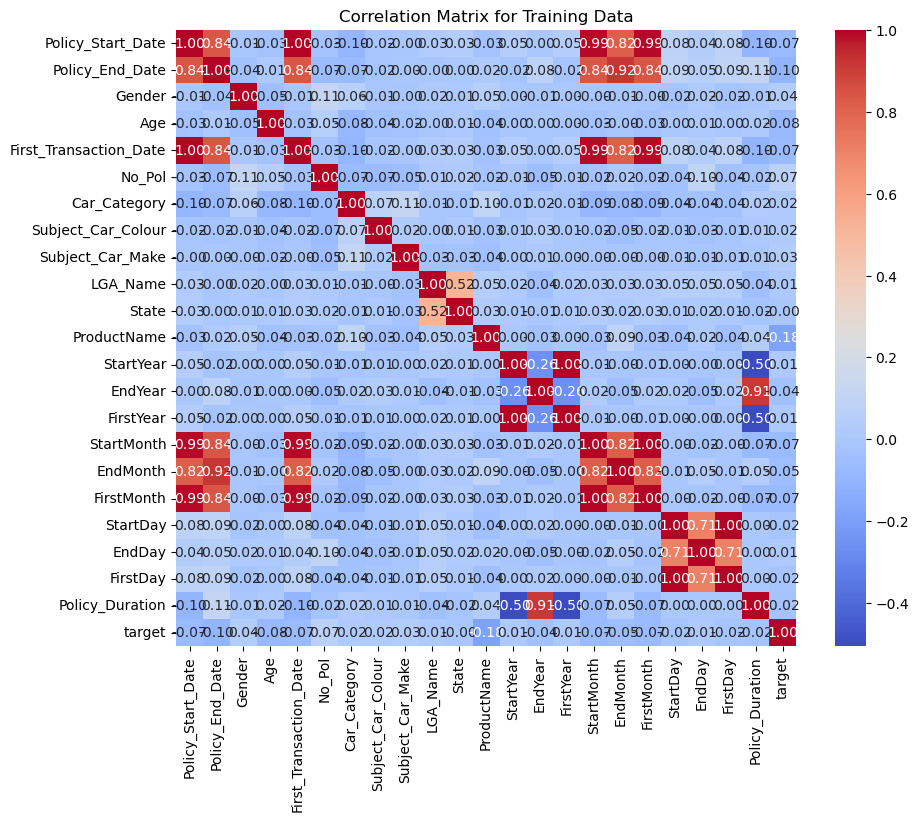

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix for Training Data
# Combine x_train and y_train into a single DataFrame for correlation calculation
train_data = pd.concat([X, y], axis=1)

# Compute the correlation matrix
correlation_matrix = train_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Training Data')
plt.show()

In [12]:
X.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,0,32,1,8,4,25,258,111,3
1,1,32,1,8,4,66,74,23,1
2,1,37,2,8,4,66,115,73,3
3,1,44,2,8,4,6,115,73,3
4,0,40,1,8,4,67,22,73,0


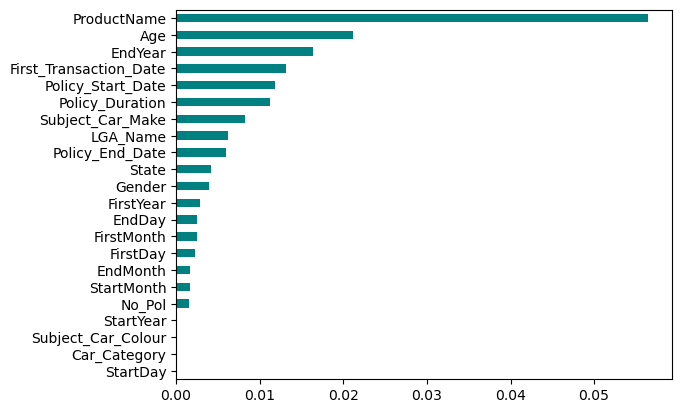

In [165]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importance = mutual_info_classif(X, y)
feat_importances = pd.Series(importance, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.metrics import f1_score, make_scorer

f1_scorer = make_scorer(f1_score)
                        
efs = ExhaustiveFeatureSelector(DecisionTreeClassifier(),
                                min_features=2,
                                max_features=7,
                                scoring=f1_scorer,
                                cv=2)

efs = efs.fit(X, y)

selected_features = train.columns[list(efs.best_idx_)]
print(selected_features)

print(efs.best_score_)

Features: 94164/94164

Index(['ID', 'Policy_Start_Date', 'Policy_End_Date', 'Age', 'No_Pol',
       'Subject_Car_Colour', 'LGA_Name'],
      dtype='object')
0.25327364599841834


In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.metrics import f1_score, make_scorer
efs = ExhaustiveFeatureSelector(RandomForestClassifier(),
                                min_features=2,
                                max_features=7,
                                scoring=f1_scorer,
                                cv=2)

efs = efs.fit(X, y)

selected_features = train.columns[list(efs.best_idx_)]
print(selected_features)

print(efs.best_score_)

In [32]:
x_best = train[['Subject_Car_Colour', 'LGA_Name']]
sub_test = test[['Subject_Car_Colour', 'LGA_Name']]

In [33]:
model = DecisionTreeClassifier()
model.fit(x_best, y)

DecisionTreeClassifier()

In [36]:
train_predictions = model.predict(x_best)

f1 = f1_score(y, train_predictions)
precision = precision_score(y, train_predictions)
recall = recall_score(y, train_predictions)
conf_matrix = confusion_matrix(y, train_predictions)

accuracy = accuracy_score(y, train_predictions)


print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print(f"Accuracy: {accuracy:.4f}")

print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.0776
Precision: 0.9077
Recall: 0.0405
Accuracy: 0.8839
Confusion Matrix:
[[10618     6]
 [ 1396    59]]


In [86]:
train_predictions

array([0, 0, 0, ..., 0, 0, 1])

# Fitting Model to Test

In [302]:
test_predictions = model.predict(sub_test)
pd.set_option('display.max_rows', 20)

pd.DataFrame(test_predictions).value_counts()

0
0    1198
1       4
Name: count, dtype: int64

In [107]:
test_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [237]:
submission = pd.DataFrame({
    'ID': test['ID'],
    'target': test_predictions
})

submission.to_csv('submission.csv', index=False)